Engy-4350: Nuclear Reactor Engineering Spring 2019 UMass Lowell; Prof. V. F. de Almeida **19Mar2019**, Austin T. Rotker **Aug2019**

# 05. Two-Temperature Boiling Water Reactor Example B
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\uvar}{\boldsymbol{u}}
  \newcommand{\fvar}{\boldsymbol{f}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Power}{\mathcal{P}}
$

---
## Table of Contents
* [Objectives](#obj)
* [Introduction](#intro)
* [Problem Statement](#ps)
* [Reactor Starup And Steady State](#res1)
* [Condenser Malfunction Results](#res2)
* [Reactor Shutdown Results](#res3)

---

## Objectives<a id="obj"></a>
+ Use one-group energy, two-temperature, point-reactor dynamics modeling (six-group delayed neutron emitters) to obtain insight on neutron density behavior with time-dependent reactivity of a Boiling Water Reactor during startup, steady state operation, shutdown and condenser malfunctions.
+ Explore and understand intrinsic temperature reactivity coefficient feedback from nuclear sources.

## Introduction<a id="intro"></a>

In-class course notes OneNote [ChEn-4350-feedback](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/Eo9JUns42F1Pqmq4tFS9sJsBv2jF8UDQvRb5l5Z2D5ssag?e=FDeSpV).

Refer to Notebook 03.


## Problem Statement<a id="ps"></a>

Consider a boiling water reactor reactor, with UO$_2$ fuel and a light water coolant and moderator.
Given the neutron generation time $\ell$, delayed neutron fraction, $\beta$, decay constants of a six-group delayed neutron emitters, $\lambda_i$, and corresponding yield of delayed neutron fractions for each emitter, $\beta_i$, calculate the pointwise neutron density variation with time for **varying** neutron reactivity, $\rho(t)$.

![](images/point-reactor-hx.png)

In [5]:
!pip install iapws
import numpy as np
import reactor



You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
done


<Figure size 2000x800 with 2 Axes>

<Figure size 2200x800 with 2 Axes>

<Figure size 2200x800 with 1 Axes>

<Figure size 2200x800 with 1 Axes>

<Figure size 2200x800 with 1 Axes>

<Figure size 2200x800 with 1 Axes>

In [ ]:
def plot_results( u_vec_history, normalize=True, semi_log=False, markers=False, precursors=True ):
    
    time_stamps = params['time_stamps']/3600
    tau = params['tau_fake']
        
    import matplotlib.pyplot as plt
    
    fig, ax1 = plt.subplots(1, figsize=(20, 8))

    if precursors == True:
        
        ax2 = ax1.twinx() # duplicate x axes to plot n and c_i's in different y axes
    
        color_ids = np.linspace(0,1,u_vec_history[:,1:-2].shape[1])
    
        for (j,color_id) in zip( range(u_vec_history[:,1:-2].shape[1]), color_ids ):
            color=plt.cm.nipy_spectral(color_id)
        
            if normalize == True:
                ax2.plot( time_stamps,u_vec_history[:,j+1]/params['c_vec_0'][j],'-.',color=color,label=r'$c_%i$'%(j+1) )
                ax2.set_ylabel(r'$c_i/c_{i_0}$',fontsize=16,color='black')
            else:
                ax2.plot( time_stamps,u_vec_history[:,j+1],'-.',color=color,label=r'$c_%i$'%(j+1) )
                ax2.set_ylabel(r'$c_i$',fontsize=16,color='black')
        
        ax2.tick_params(axis='y', labelcolor='black', labelsize=14)
        ax2.legend(loc='lower right',fontsize=12)
        if semi_log == True:
            ax2.set_yscale('log') # uncomment to plot y in log scale
        #ax2.grid(True)

    if markers == True:
        if normalize == True:
            ax1.plot( time_stamps,u_vec_history[:,0]/params['n_0'],'-',marker='+',color='red',label=r'$n/n_0$' )
            ax1.set_ylabel(r'$n$',fontsize=16,color='black')
        else:
            ax1.plot( time_stamps,u_vec_history[:,0],'-',marker='+',color='red',label=r'$n$' )
            ax1.set_ylabel(r'$n$',fontsize=16,color='black')
    else:
        if normalize == True:
            ax1.plot(time_stamps,u_vec_history[:,0]/params['n_0'],'-',color='red',label=r'$n/n_0$' )
            ax1.set_ylabel(r'$n/n_0$',fontsize=16,color='black')
        else:
            ax1.plot(time_stamps,u_vec_history[:,0],'-',color='red',label=r'$n$' )
            ax1.set_ylabel(r'$n$',fontsize=16,color='black')

    ax1.set_xlabel(r'Time [h]',fontsize=16)
    
    ax1.tick_params(axis='y', labelcolor='black', labelsize=14)
    ax1.tick_params(axis='x', labelsize=14)
    ax1.legend(loc='best',fontsize=12)
    if semi_log == True:
        ax1.set_yscale('log') # uncomment to plot y in log scale
    ax1.grid(True)

    plt.title(r'Point-Reactor Model: $\rho/\beta=$'
              +str(params['reactivity']/params['beta'])
              +r'; $q_0=$'+str(round(params['q_0'],2)),
              fontsize=18)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show() 

    print('')

In [2]:
# '''Parameters'''
import math
import scipy.constants as sc
import iapws.iapws97 as steam_table
params = dict()

#Data pertaining to one-group energy neutron balance
params['gen_time']     = 1.0e-4  # s
params['beta']         = 6.5e-3  # 
params['k_infty']      = 1.34477
params['buckling'] = (math.pi/2.375)**2.0 + (2.405/4.1)**2.0 # geometric buckling; B = (pi/R)^2 + (2.405/H)^2
params['q_0'] = 0.1
params['fuel macro a'] = 1.34226126162 #fuel macroscopic absorption cross section, cm^-1
params['mod micro a'] = 0.332 * sc.zepto * sc.milli #moderator microscopic absorption cross section, cm^2
params['n fuel'] = 1.9577906e+21 #number density of the fuel, atoms/cm^3
params['I'] = 40.9870483 #resonance integral, I (dimensionless)
params['mod micro s'] = 20 * sc.zepto * sc.milli # moderator microscopic scattering cross section, cm^2
params['xi'] = 1 # average logarithmic energy decrement for light water
params['E0'] = 2 * sc.mega # energy of a neutron produced by fissioning, in electron volts
params['mod mu0'] = 0.71 # migration and diffusion area constants
params['eta'] = 1.03 # fast fission factor
params['epsilon'] = 2.05 # neutron multiplecation factor
params['mod molar mass'] = 18 # g/mol

params['reg_rod_worth'] = 1.5e-4 # pcm

params['n_dens_ss_operation'] = 1 #1.963e13/2200 * 1e4 #  #neutrons/m^2

#Delayed neutron emission
params['species_decay']     = [0.0124, 0.0305, 0.111, 0.301, 1.14, 3.01] # 1/sec
params['species_rel_yield'] = [0.033, 0.219, 0.196, 0.395, 0.115, 0.042] 

#Data pertaining to two-temperature heat balances
params['fis_energy']           = 180 * 1.602e-13 # J/fission 
params['enrich']               = 4.3/100.
params['fuel_mat_mass_dens']   = 10.5 # g/cc
#params['moderator_fuel_ratio'] = 387 # atomic number concentration ratio
params['sigma_f_o']            = 586.2 * 100 * 1e-30 # m2
params['temp_o']               = 20 + 273.15 # K
params['thermal_neutron_velo'] = 2200 # m/s

params['fis_nuclide_num_dens_fake'] = 9.84e26 # (fissile nuclei)/m3

params['q_c'] = 303 # volumetric flow rate

params['fuel_dens']   = 10500 # kg/m3
params['cp_fuel']     = 300 # J/(kg K)
params['fuel_volume'] = 15.0157429 # m3

params['steam flowrate'] = 1820 # kg/s
params['coolant_dens']   = 1000 #  kg/m3
params['cp_coolant']     =  4184# J/(mol K) - > J/(kg K)
params['coolant_volume'] = 13750 * 0.8 # m3

params['ht_coeff'] = 800000000
params['turbine efficiency'] = 0.8 
params['condenser efficiency'] = 0.8
params['pump efficiency'] = 0.8

params['fis_prod_beta_energy_rate']  = 1.26 * 1.602e-13 # J/(fission sec) 1.26 t^-1.2 (t in seconds)
params['fis_prod_alpha_energy_rate'] = 1.40 * 1.602e-13 # J/(fission sec) 1.40 t^-1.2 (t in seconds)
# % subcooling based on the % subcooling that exists at steady state
params['% subcooling'] = 1 #(1 -(steam_table._Region4(7, 0)["h"]  - steam_table._Region1(493.15, 7)["h"])/(steam_table._Region4(7,0)["h"]))
params['shutdown temp reached'] = False
params['q_source_status'] = 'in' # is q_source inserted (in) or withdrawn (out)

<a id="res2"></a>
# Steady State Reactor Startup Followed By Condenser Malfunction
The reactor is started up as normal, and some time is allowed to pass with the reactor functioning at steady state. After this time has passed, the condenser experiences a malfunction wherein the degree of subcooling of the liquid leaving the condenser is decreased for a period of time, leading to an increase in reactor operating temperatures.

In [6]:
'''Setup up initial conditions'''

import numpy as np
import scipy.constants as sc

params['malfunction start'] = 4 * sc.hour 
params['malfunction end'] = 4 * sc.hour + 15 * sc.minute
params['shutdown time'] = 9999 * sc.hour

gen_time = params['gen_time'] # retrieve neutron generation time
params['q_0'] = 0.1

params['n_ss'] = 0 # neutronless steady state before start up

rho_0_over_beta = 0.25 # $
beta = params['beta']

params['alpha_n'] = 0 # control rod reactivity worth; enough to cancel out the negative 

params['reactivity'] = rho_0_over_beta * beta # "rho/beta = 10 cents"

params['temp_0'] = params['temp_o']

params['tau_fake'] = 8 # s
params['malfunction subcooling'] = 0.75
params['alpha_n_malfunction'] = 0

# setup remaining initial conditions
reactor.setup_initial_conditions(params)

In [15]:
'''Evolve the point-reactor'''

time_final    = 5 * sc.hour # 450 # s
n_time_stamps = 500 # number of solution values in time

params['time_final']    = time_final
params['n_time_stamps'] = n_time_stamps

# Run the reactor and compute the history of the state variables; tabular form, one row per time stamp
u_vec_history2 = reactor.run_point_reactor( reactor.f_vec, params )
#print(u_vec_history)
print("done")


done


ValueError: x and y must have same first dimension, but have shapes (200,) and (500,)

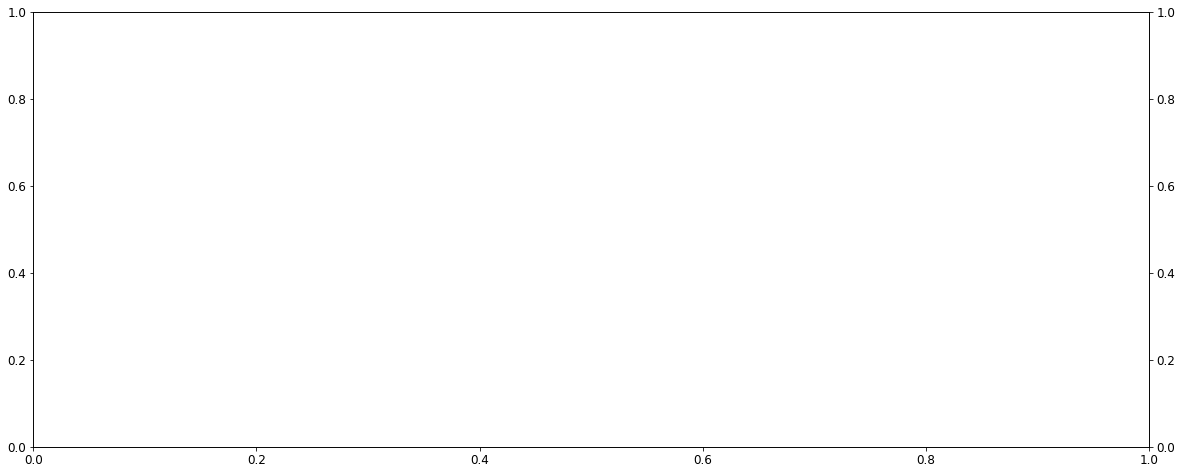

In [16]:
reactor.plot_results(u_vec_history2, params)

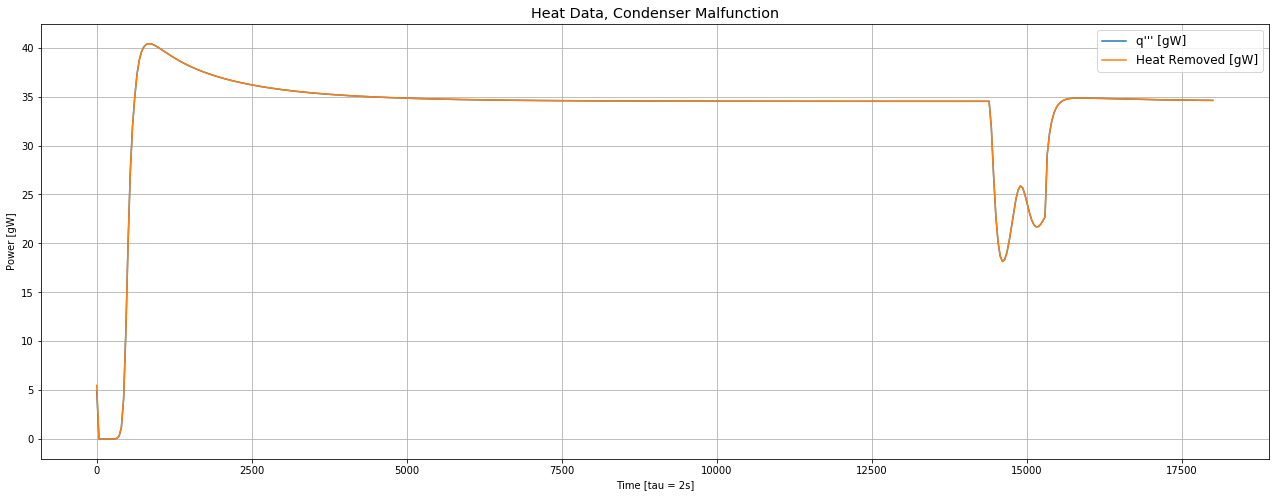

In [8]:
import matplotlib.pyplot as plt
heat_data = reactor.quantities1(u_vec_history, params, params['time_stamps'])
plt.figure(figsize=(22, 8))
plt.plot(params['time_stamps']/sc.hour, heat_data["q''' [gW/m3]"], params['time_stamps']/sc.hour, heat_data["heat removed [gW/m3]"])
plt.grid()
plt.rc('font', size=12)
plt.xlabel('Time [tau = 2s]')
plt.ylabel('Power [GW]')
plt.title('Heat Data, Condenser Malfunction')
plt.legend(["q''' [GW]", 'Heat Removed [GW]'])


The condenser malfunction modeled here results in a decrease in the subcooling of the liquid leaving the condenser, resulting in higher inlet temperatures $T_\text{in}$. This higher inlet temperature reduces the heat removed from the system following newton's law of cooling, whereby the heat removed from the system is proportional to:

\begin{equation*}
T_\text{fuel} - T_\text{in}
\end{equation*}

With an increase in the second term causing a corresponding decrease in the heat removed from the system.

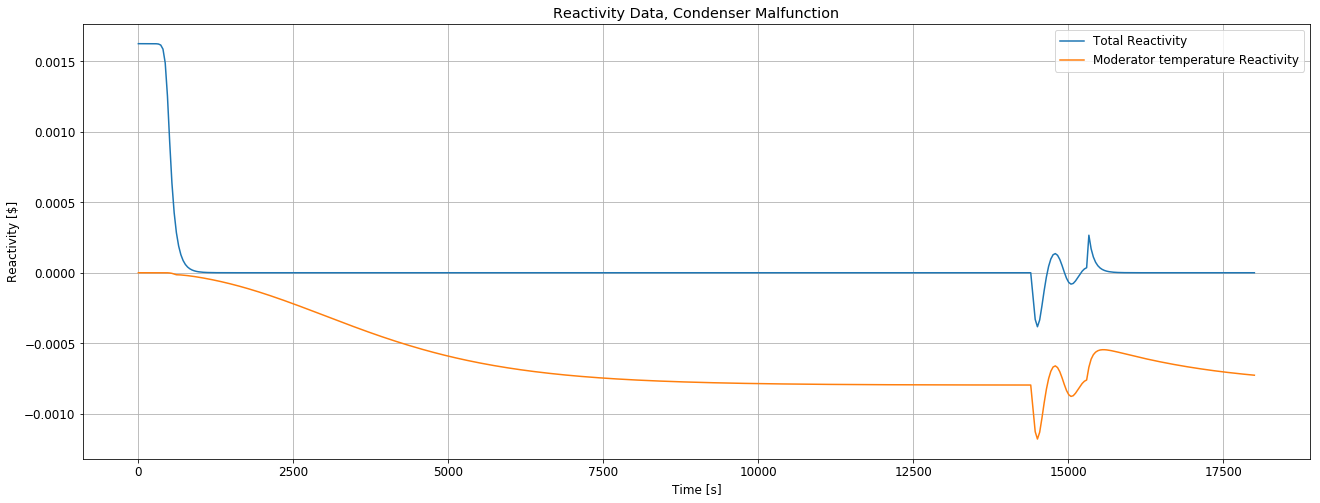

In [9]:
quants = reactor.quantities3(u_vec_history, params, params['time_stamps'])
plt.figure(figsize=(22, 8))
plt.plot(params['time_stamps']/sc.hour, quants[0])
plt.grid()
plt.rc('font', size=12)
plt.xlabel('Time [h]')
plt.ylabel('Reactivity [$]')
plt.title('Reactivity Data, Condenser Malfunction')
plt.legend(['Total Reactivity','Moderator temperature Reactivity'])


Text(0.5, 1.0, 'Regulating Rod Position, Condenser Malfunction')

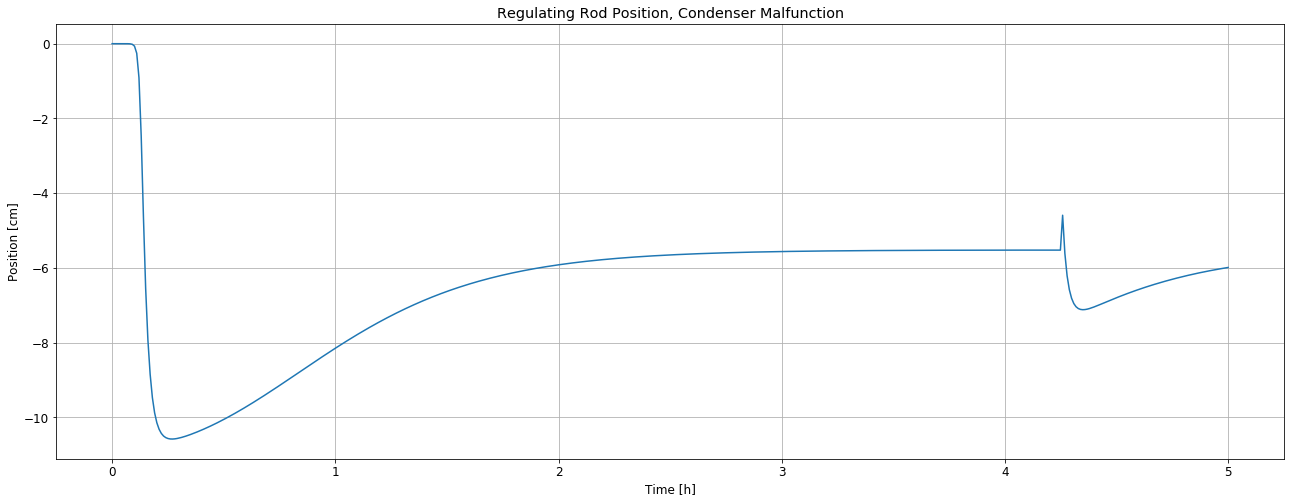

In [11]:
plt.figure(figsize=(22, 8))
plt.plot(params['time_stamps']/sc.hour, quants[1])
plt.grid()
plt.rc('font', size=12)
plt.xlabel('Time [h]')
plt.ylabel('Position [cm]')
plt.title('Regulating Rod Position, Condenser Malfunction')

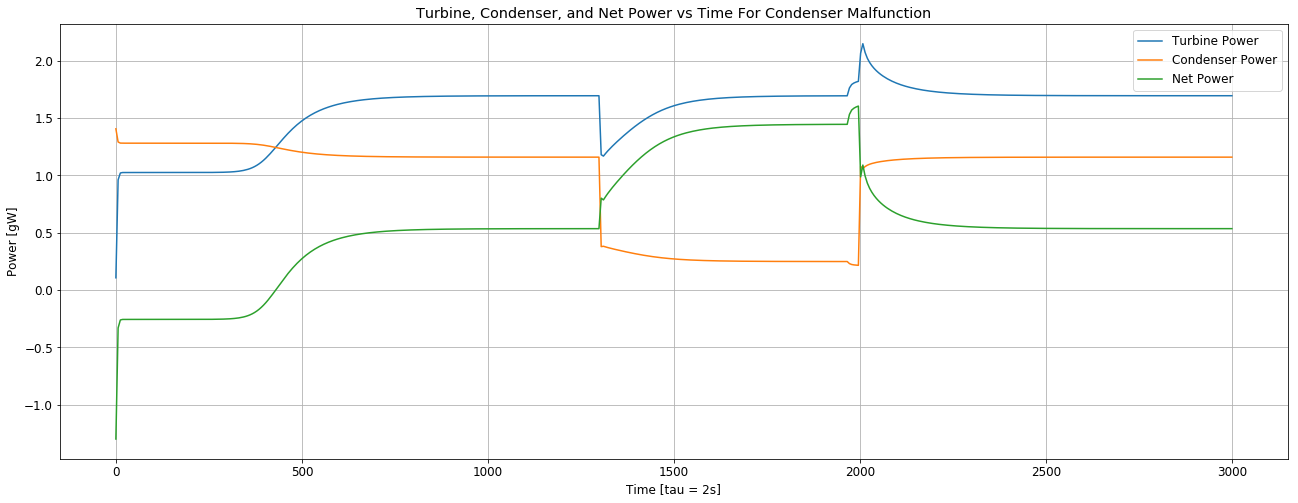

In [8]:
work_data = reactor.quantities2(u_vec_history, params, params['time_stamps'])
plt.figure(figsize=(22, 8))
plt.plot(params['time_stamps'], work_data)
plt.grid()
plt.rc('font', size=12)
plt.xlabel('Time [tau = 2s]')
plt.ylabel('Power [gW]')
plt.title('Turbine, Condenser, and Net Power vs Time For Condenser Malfunction')
plt.legend(['Turbine Power','Condenser Power', 'Net Power'])

Loss of subcooling leads to an immediate spike in the temperature of the coolant entering the reactor, and therefore another spike in the temperature of the coolant leaving the reactor. This higher temperature also leads to a spike in turbine work around the same time. However, the rise in the temperature of the coolant also leads to a reduction in the heat removed by the coolant as the total heat transferred is reduced. This leads to turbine work gradually falling and condenser work gradually increasing as reactor temperature continues to gradually increase for the duration of the condenser malfunction.

At the end of the malfunction, condenser subcooling returns to normal, leading to an immediate decrease in the temperatures in the reactor. This causes turbine work to decrease with the decreasing coolant temperature, and condenser work to increase, leading to a new steady state condition.

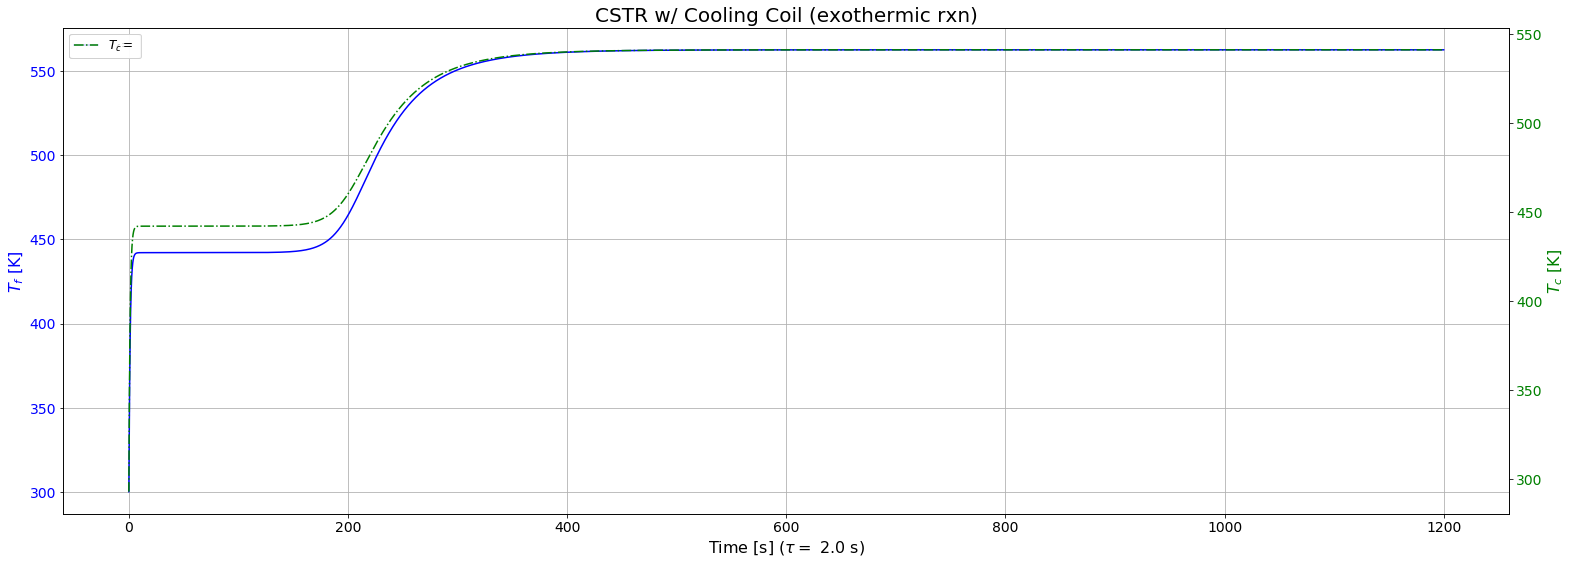

In [9]:
reactor.tmp()

During the condenser malfunction, the operating temperatures of the reactor increase to about 500 K for the coolant and 550 K for the fuel, before decreasing to normal operating levels after the end of the malfunction.

ValueError: x and y must have same first dimension, but have shapes (10000,) and (500,)

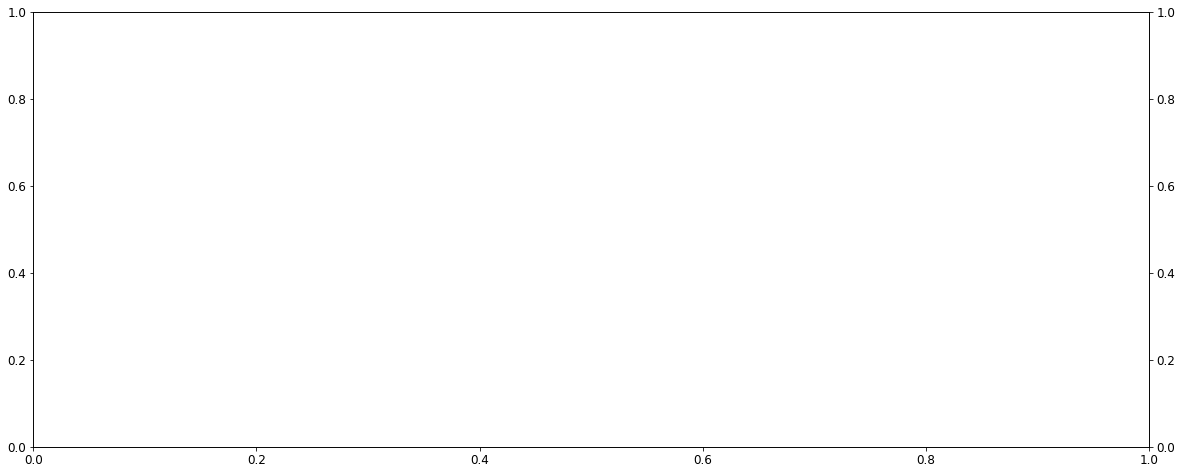

In [10]:
reactor.plot_results(u_vec_history, params)

Due to an extremely small temperature reactivity coefficient, there is no observable effect on the neutron density in the reactor during or after the condenser malfunction.

<a id="res3"></a>
# Shutdown
The reactor starts up as normal, operates for a certain period of time at steady state, and then shuts down to zero power.

In [ ]:
'''Setup up initial conditions'''

import numpy as np
import reactor

params['malfunction start'] = 13000
params['malfunction end'] = 0
params['breakage start'] = 13000
params['breakage end'] = 0
params['shutdown time'] = 2000

gen_time = params['gen_time'] # retrieve neutron generation time
params['q_0'] = 1

params['n_ss'] = 0 # neutronless steady state before start up

rho_0_over_beta = 0.25 # $

beta = params['beta'] # retrieve the delayed neutron fraction
params['reactivity'] = rho_0_over_beta * beta # "rho/beta = 10 cents"

params['temp_0'] = params['temp_o']

params['tau_fake'] = 2 # s

# setup remaining initial conditions
reactor.setup_initial_conditions(params)

In [ ]:
'''Evolve the point-reactor'''

time_final    = 12000# 450 # s
n_time_stamps = 1000 # number of solution values in time

params['time_final']    = time_final
params['n_time_stamps'] = n_time_stamps

# Run the reactor and compute the history of the state variables; tabular form, one row per time stamp
u_vec_history = reactor.run_point_reactor( reactor.f_vec, params )
#print(u_vec_history)
print("done")

In [ ]:
import matplotlib.pyplot as plt
heat_data = reactor.quantities1(u_vec_history, params, params['time_stamps'])
plt.figure(figsize=(22, 8))
plt.plot(params['time_stamps'], heat_data["q''' [gW/m3]"], params['time_stamps'], heat_data["heat removed [gW/m3]"])
plt.grid()
plt.rc('font', size=12)
plt.xlabel('Time [tau = 2s]')
plt.ylabel('Power [gW]')
plt.title('Heat Data, Shutdown')
plt.legend(["q''' [gW]", 'Heat Removed [gW]'])

The reactor shuts down as would be expected, with Q''' and heat removed both going to zero after the reactor is shut down.

In [ ]:
quants = reactor.quantities3(u_vec_history, params, params['time_stamps'])
plt.figure(figsize=(22, 8))
plt.plot(params['time_stamps'], quants[0])
plt.grid()
plt.rc('font', size=12)
plt.xlabel('Time [s]')
plt.ylabel('Reactivity [$]')
plt.title('Reactivity Data, Reactor Shutdown')
plt.legend(['Total Reactivity','Moderator temperature Reactivity'])

In [ ]:
plt.figure(figsize=(22, 8))
plt.plot(params['time_stamps'], quants[1])
plt.grid()
plt.rc('font', size=12)
plt.xlabel('Time [s]')
plt.ylabel('Position [cm]')
plt.title('Regulating Rod Position, Reactor Shutdown')

In [ ]:
work_data = reactor.quantities2(u_vec_history, params, params['time_stamps'])
plt.figure(figsize=(22, 8))
plt.plot(params['time_stamps'], work_data)
plt.grid()
plt.rc('font', size=12)
plt.xlabel('Time [tau = 2s]')
plt.ylabel('Power [gW]')
plt.title('Turbine, Condenser, and Net Power vs Time For Reactor Shutdown')
plt.legend(['Turbine Power','Condenser Power', 'Net Power'])

Condenser and turbine work do not decrease to zero, but instead go to new lower steady state values as the ending temperature of the reactor is much higher than the beginning temperature of the reactor, meaning that steam is still flowing to the turbine and liquid must still be pumped to the reactor at relatively high operating pressures.

In [ ]:
reactor.tmp()

The dual temperature asymtopes seen in reactor startup are also present during the startup in this case. After shut down, the reactor runs to new steady state values for temperature based on the heat removed by the turbine and condenser, at around 440 degrees kelvin for both the coolant and the fuel.

In [ ]:
reactor.plot_results(u_vec_history, params)

Neutron and delayed emitter concentrations head to zero after shutdown as is expected.